In [7]:
from matplotlib.pyplot import matshow
import matplotlib.pylab as plt
import matplotlib.animation as animation
from random import random, choice
import numpy as np

**Projet simulation feu de forêt:**

**Présentation du projet:**

Le but de ce projet est d'utilisé les automates cellulaires qui permettent de simuler la propagation d'un feu de forêt

Idée d'amélioration du réalisme de la simulation du feu de forêt. Crée un système de temps; c'est-à-dire faire une simulation du forêt jusqu'à ce que le feu se soit éteint, ou qu'il est brulé toute les zones possible.
Différence entre les arbres, notamment sur leurs vitesses à bruler. Ajout d'une nouvelle couleurs pour les arbres qui mettent plus de temps à brûler.


Couleur orange propriété:

Elle stop la propagation du feu. C'est à dire qui un carré orange ne propage pas le feu à ses voisins. Quand il est en orange il va mettre t temps à devenir rouge. Une fois que le carré devient rouge il récupère ses propriétés de propagation du feu. La variable t qui représente le temps de transition de la couleur orange à jaune sera modifié en fonction de la vitesse du vent. 

(si l'idée de temps est trop compliqué à mettre en place on comptera en tour de boucle)

In [10]:
def hasard(p):
    "renvoie True avec une probabilite p et False avec une probabilité 1-p"
    r=random() # on prend au hasard un nombre entre 0 et 1
    assert p>=0 and p<=1 # verifions que p est dans [0,1]
    return r <= p # si n<=p (une proba p) on retourne True sinon on retourne False (une proba 1-p)
             
def creerForet(n,m,pcoccup):
    "cree une foret avec des arbres places aleatoirements"
    foret=np.zeros((n,m)) # on cree un matrice n*m de zeros
    for i in range(n):
        for j in range(m):
            if hasard(pcoccup):
                foret[i,j]=1. # si on une proba p alors il y a un arbre
            else:
                foret[i,j]=0. # sinon il n'y a pas d'arbre
    return foret
 
# modifier la fonction hasard pour qu'elle choisisse un nombre au hasard entre 0, 1 et 1.5
    
    # <<<<<<<<<<<< 2) SIMULATION >>>>>>>>>>>>
 
def mettreLeFeu(foret,i,j):
    "met le feu a un arbre"
    if foret[i,j]==1:
        foret[i,j]=2. # on met le feu la case d'indice (i,j)
    return foret

# if foret[i,j]==1.5:
   # foret[i,j]=2.5
#if foret[i,j]==2.5
   # foret[i,j]=2  
 
def peutBrulerSansVent(foret,i,j):
    "verifie si l'arbre d'indice (i,j) est a proximite d'un arbre en feu"
    n,m=foret.shape # n et m respectivement le nombre de lignes et de colonnes
    if foret[i,j]==1.:
        for y in range(max(0,i-1),min(n,i+2)): # bord haut et bas
            if foret[y,j]==2.:
                return True
        for x in range(max(0,j-1),min(m,j+2)): # bord gauche et droit
            if foret[i,x]==2.:
                return True
    return False

 
def propageFeu(foret):
    "les arbres qui peuvent bruler autour d'un arbre en feu prennent feu"
    n,m=foret.shape # n et m respectivement le nombre de lignes et de colonnes
    c=np.copy(foret)
    for i in range(n):
        for j in range(m):
            if peutBrulerSansVent(c,i,j):
                foret[i,j]=2.
    return foret
 
def auFeu(foret):
    "verifie si au moins un arbre non en feu peut bruler"
    n,m=foret.shape
    for i in range(n):
        for j in range(m):
            if peutBrulerSansVent(foret,i,j):
                return True
    return False
                 
def metFeuForet(foret,i,j):
    "met le feu et propage l'incendie jusqu'a ce que tous les arbres qui peuvent bruler soient en feu"
    foret=mettreLeFeu(foret,i,j)
    while auFeu(foret):
        foret = propageFeu(foret)
    return foret
 
 
    # <<<<<<<<<<<< 3) ANIMATION >>>>>>>>>>>>
 
def animationFeu(foret,i,j):
    fig = plt.figure() # nouvelle figure
    film = []
     
    # Initialisation
    foretFeu = mettreLeFeu(foret,i,j)
    film.append([matshow(foretFeu, fignum=False, animated=True)])
    plt.draw() # mise a jour en temps reel du contenu des figures
     
    # Propagation
    while auFeu(foret):
        foretFeu = propageFeu(mettreLeFeu(foret,i,j))
        film.append([matshow(foretFeu, fignum=False, animated=True)])
        plt.draw() # mise a jour en temps reel du contenu des figures
     
    # Animation
    ani = animation.ArtistAnimation(fig, film, interval=1000, blit=True, repeat_delay=100)
     
    plt.draw() # mise a jour en temps reel du contenu des figures
    plt.show()
 
    # <<<<<<<<<<<< TEST VENT EST >>>>>>>>>>>>
 
def proba(p_0):
    p_0=100*p_0
    p_1= (100-p_0)/2.
    assert p_0%2==0 # ici on veut que a soit pair pour que la somme des probas fasse bien 1
    assert int(p_0)+2*int(p_1) == 100
    liste = int(p_0)*["p_0"]+int(p_1)*["p_11"]+int(p_1)*["p_12"]
    return choice(liste)
     
def peutBrulerVentEst(foret,i,j,p_0):
    n,m=foret.shape # n et m respectivement le nombre de lignes et de colonnes
    if foret[i,j]==1.:
        # direction droite
        if proba(p_0)=="p_0":
            for x in range(max(0,j-1),j):
                if foret[i,x]==2.:
                    return True
        #diagonale haute
        if proba(p_0)=="p_11":
            for hy in range(i,min(n,i+1)):
                for hx in range(max(0,j-1),j):
                    if foret[hy,hx]==2.:
                        return True
        # diagonale basse
        if proba(p_0)=="p_12":
            for by in range(max(0,i-1),i):
                for bx in range(max(0,j-1),j):
                    if foret[by,bx]==2.:
                        return True
    return False
 
def propageFeuVentEst(foret,p_0):
    n,m=foret.shape # n et m respectivement le nombre de lignes et de colonnes
    c=np.copy(foret)
    for i in range(n):
        for j in range(m):
            if peutBrulerVentEst(c,i,j,p_0):
                foret[i,j]=2.
    return foret
 
def auFeuVentEst(foret,p_0):
    "verifie si au moins un arbre non en feu peut bruler"
    n,m=foret.shape
    for i in range(n):
        for j in range(m):
            if peutBrulerVentEst(foret,i,j,p_0):
                return True
    return False
 
def metFeuForetVentEst(foret,p_0):
    while auFeuVentEst(foret,p_0):
        foret = propageFeuVentEst(foret,p_0)
    return foret
 
def animationFeuVentEst(foret,i,j):
    fig = plt.figure() # nouvelle figure
    film = []
     
    # Initialisation
    film.append([matshow(foret, fignum=False, animated=True)])
    plt.draw() # mise a jour en temps reel du contenu des figures
     
    # Propagation
    while auFeuVentEst(foret):
        foret = propageFeuVentEst(foret)
        film.append([matshow(foret, fignum=False, animated=True)])
        plt.draw() # mise a jour en temps reel du contenu des figures
     
    # Animation
    ani = animation.ArtistAnimation(fig, film, interval=100, blit=True, repeat_delay=100)
     
    plt.draw() # mise a jour en temps reel du contenu des figures
    plt.show()

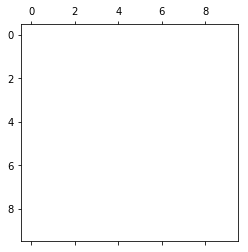

In [13]:
animationFeu(creerForet(10,10,0.2),2,2)